# Text Classification

## Preparing the Data

In [4]:
import nltk
from nltk.corpus import movie_reviews
from collections import Counter

nltk.download('movie_reviews')

labels = []
instances = []

pos_reviews = []
neg_reviews = []

for label in movie_reviews.categories():
    for fileid in movie_reviews.fileids(label):
        doc = movie_reviews.words(fileid)
        if label == 'pos':
            pos_reviews.append(" ".join(doc))
        else:
            neg_reviews.append(" ".join(doc))
            
train_pos_reviews = pos_reviews[:900]
train_neg_reviews = neg_reviews[:900]
test_pos_reviews = pos_reviews[900:]
test_neg_reviews = neg_reviews[900:]

print("Number of training data %d (POS) %d (NEG)" % (
    len(train_pos_reviews), len(train_neg_reviews)) )
print("Number of test data %d (POS) %d (NEG)" % (
    len(test_pos_reviews), len(test_neg_reviews)) )

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/hhhuang/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Number of training data 900 (POS) 900 (NEG)
Number of test data 100 (POS) 100 (NEG)


In [6]:
train_X = []
train_Y = []
test_X = []
test_Y = []

for x in train_pos_reviews:
    train_X.append(x)
    train_Y.append(1)
for x in train_neg_reviews:
    train_X.append(x)
    train_Y.append(0)
    
for x in test_pos_reviews:
    test_X.append(x)
    test_Y.append(1)
for x in test_neg_reviews:
    test_X.append(x)
    test_Y.append(0)
    
print(test_X[0])

in 1912 , a ship set sail on her maiden voyage across the atlantic for america . this ship was built to be the largest ship in the world , and she was . she was also build to be one of the most luxurious , and that she was . finally , she was built to be unsinkable and that unfortunately she was not . to get a ticket for this voyage you either : spent a life ' s savings to get to america to start life anew , were part of the upper class and had the money to spare , or finally were lucky enough to have a full house in a poker match by the docks like jack dawson . jack dawson makes the trip , and happens to be at the right place at the right time . rose dewitt bukater , a first class passenger , climbs the railings at the aft of the ship with thoughts of jumping . thus is started a tale of romance and intrigue , and a tale of death and tragedy . . . this movie is about a tragic event that took place a great many years ago , an even that should not be taken lightly as any other bit of his

## Feature Extraction

You may need to install the package:
pip3 install sklearn

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

feature_extractor = CountVectorizer()
training_vectors = feature_extractor.fit_transform(train_X)

print(feature_extractor.get_feature_names())

['00', '000', '0009f', '007', '00s', '03', '04', '05', '05425', '10', '100', '1000', '100m', '101', '102', '103', '104', '105', '106', '107', '108', '109', '10b', '10s', '10th', '11', '110', '111', '112', '113', '1138', '114', '115', '117', '118', '11th', '12', '121', '122', '123', '125', '126', '127', '1272', '128', '129', '1298', '12th', '13', '130', '1305', '132', '133', '135', '137', '138', '139', '13th', '14', '140', '1400', '143', '14th', '15', '150', '1500s', '150th', '151', '152', '1521', '153', '155', '1554', '157', '1583', '1590', '15th', '16', '160', '1600', '161', '165', '167', '1692', '16mm', '16th', '16x9', '17', '1700s', '1709', '172', '175', '1773', '1791', '1792', '1793', '1794', '1799', '17th', '18', '180', '1800', '1800s', '1812', '1830s', '1839', '1847', '1865', '1869', '1871', '1885', '1888', '189', '1896', '1898', '1899', '18s', '18th', '19', '1900', '1900s', '1903', '1908', '1912', '1913', '1914', '1916', '1919', '1920s', '1922', '1923', '1925', '1926', '1928', '

## Training a model

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(training_vectors, train_Y)

## Test the model

In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

test_vectors = feature_extractor.transform(test_X)
pred_Y = clf.predict(test_vectors)

accuracy = accuracy_score(test_Y, pred_Y)
precision = precision_score(test_Y, pred_Y, average='macro')
recall = recall_score(test_Y, pred_Y, average='macro')
fscore = f1_score(test_Y, pred_Y, average='macro')

print("Accuracy: %g\tPrecision: %g\tRecall: %g\tF-score: %g" % (
    accuracy, precision, recall, fscore))

Accuracy: 0.645	Precision: 0.645015	Recall: 0.645	F-score: 0.644991


## Adjust the model parameters and evaluate again

In [10]:
clf = DecisionTreeClassifier(min_samples_leaf=10)
clf = clf.fit(training_vectors, train_Y)

pred_Y = clf.predict(test_vectors)

accuracy = accuracy_score(test_Y, pred_Y)
precision = precision_score(test_Y, pred_Y, average='macro')
recall = recall_score(test_Y, pred_Y, average='macro')
fscore = f1_score(test_Y, pred_Y, average='macro')

print("Accuracy: %g\tPrecision: %g\tRecall: %g\tF-score: %g" % (
    accuracy, precision, recall, fscore))

Accuracy: 0.675	Precision: 0.679028	Recall: 0.675	F-score: 0.673162


#### Visualizing the learned decision tree

You man need to install GraphViz (apt-get or brew & pip) and Pydotplus (pip)

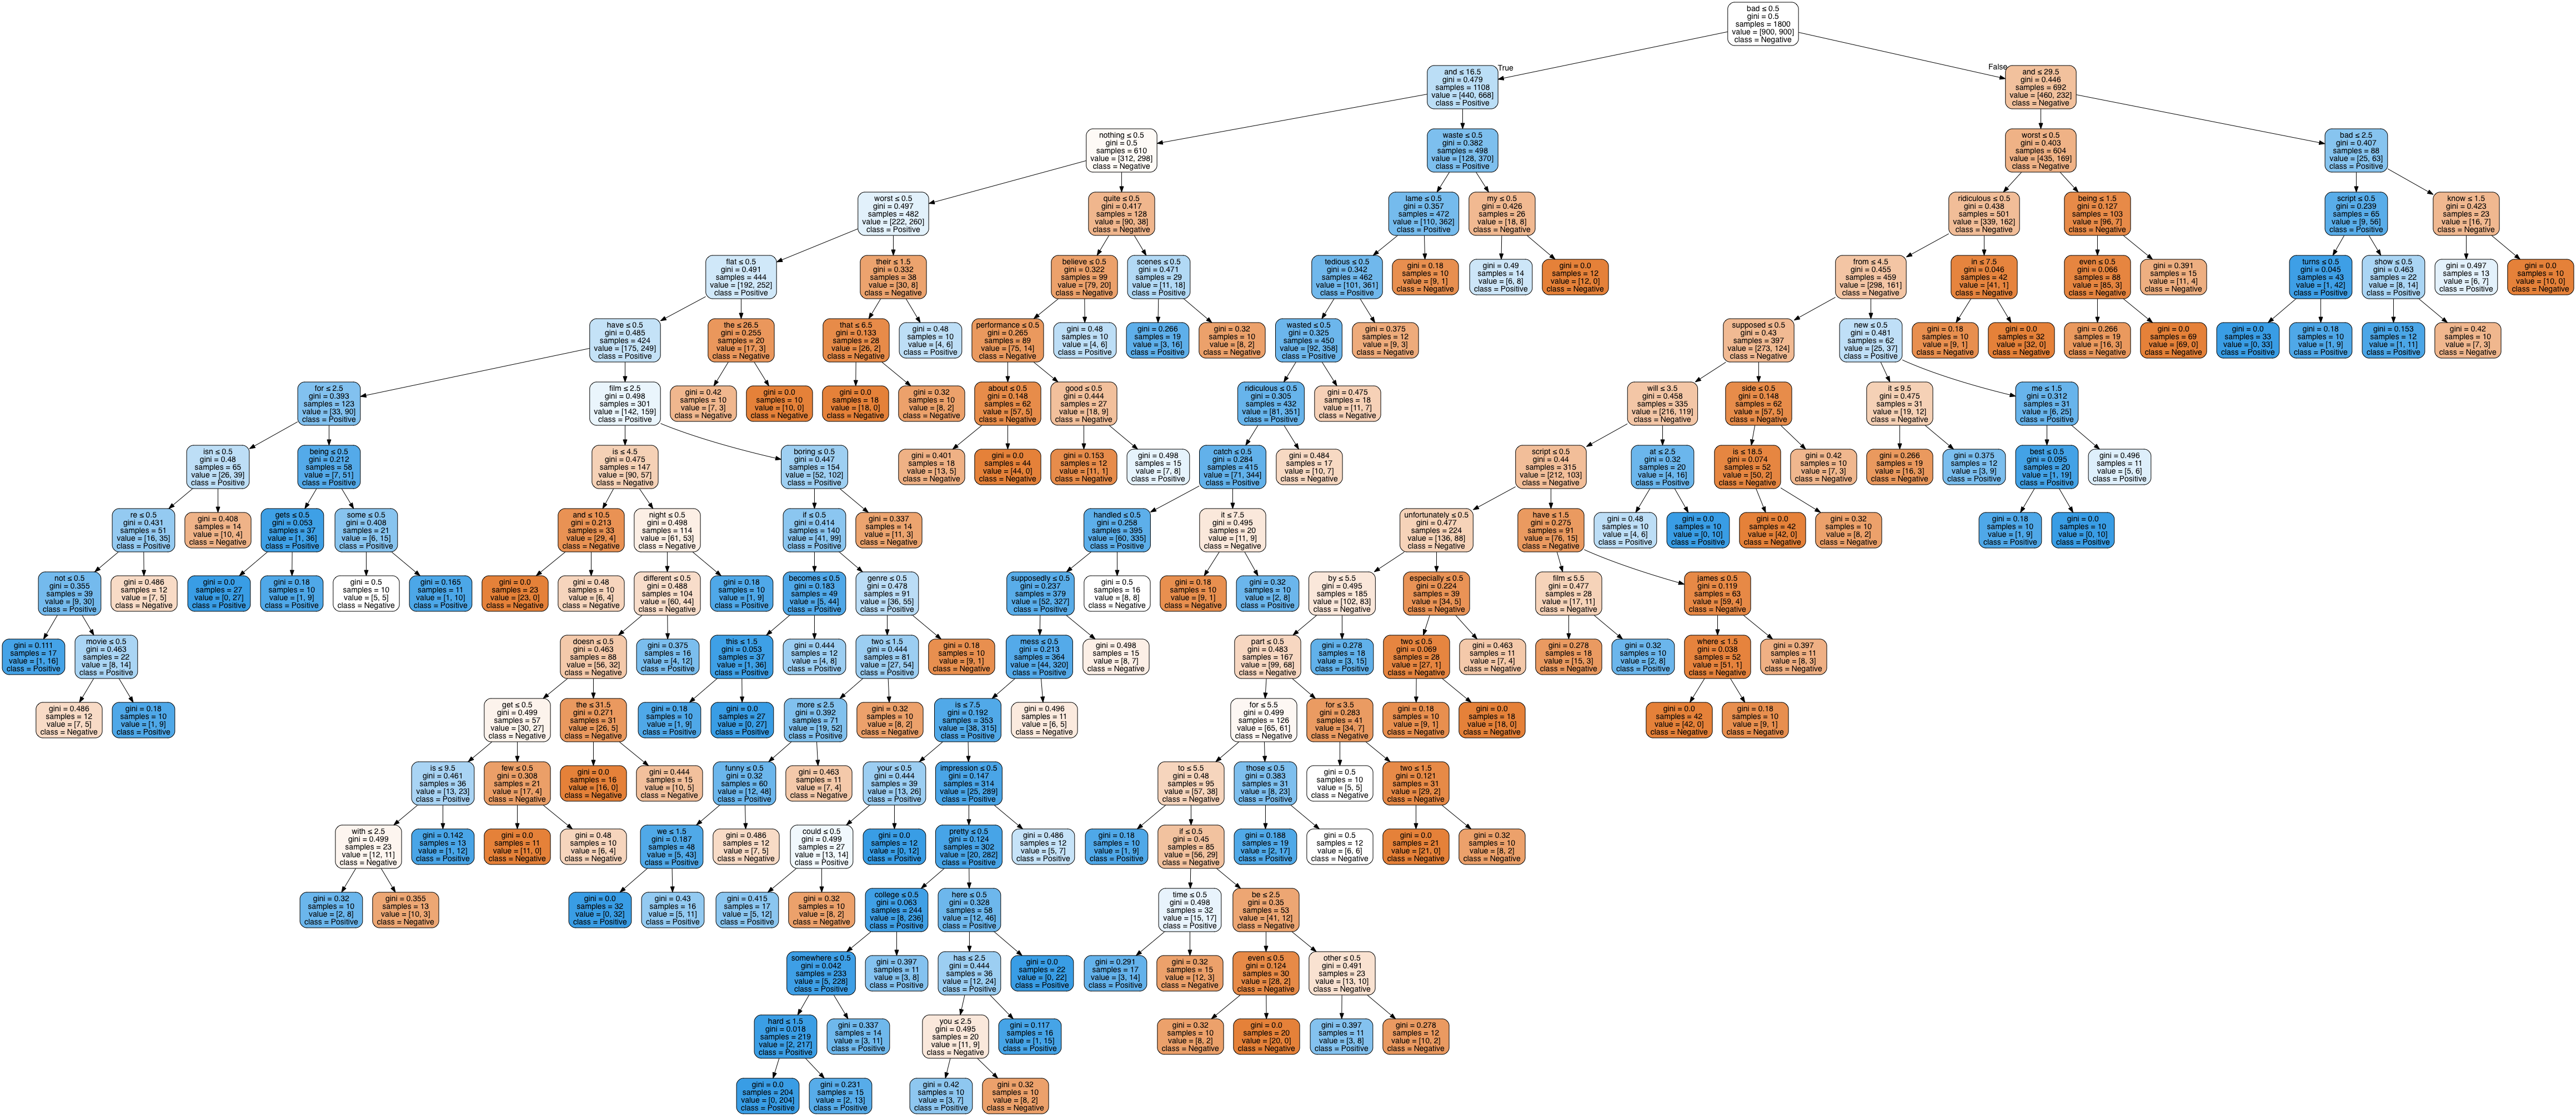

In [17]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=feature_extractor.get_feature_names(),  
                         class_names=['Negative', 'Positive'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Try another classification model

In [18]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf = clf.fit(training_vectors, train_Y)

pred_Y = clf.predict(test_vectors)

accuracy = accuracy_score(test_Y, pred_Y)
precision = precision_score(test_Y, pred_Y, average='macro')
recall = recall_score(test_Y, pred_Y, average='macro')
fscore = f1_score(test_Y, pred_Y, average='macro')

print("Accuracy: %g\tPrecision: %g\tRecall: %g\tF-score: %g" % (
    accuracy, precision, recall, fscore))

Accuracy: 0.83	Precision: 0.833333	Recall: 0.83	F-score: 0.829574


Better than our implementation!

## Try logistic regression model

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(training_vectors, train_Y)

pred_Y = clf.predict(test_vectors)

accuracy = accuracy_score(test_Y, pred_Y)
precision = precision_score(test_Y, pred_Y, average='macro')
recall = recall_score(test_Y, pred_Y, average='macro')
fscore = f1_score(test_Y, pred_Y, average='macro')

print("Accuracy: %g\tPrecision: %g\tRecall: %g\tF-score: %g" % (
    accuracy, precision, recall, fscore))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.85	Precision: 0.850561	Recall: 0.85	F-score: 0.84994


## Feature Engineering

Attemp to remove the noisy features

In [20]:
def clean(x):
    tokens = x.split()
    cleaned_tokens = []
    for tok in tokens:
        if tok.isalpha():
            cleaned_tokens.append(tok.lower())
    return " ".join(cleaned_tokens)

cleaned_train_X = []
cleaned_test_X = []
for x in train_X:
    cleaned_train_X.append(clean(x))
for x in test_X:
    cleaned_test_X.append(clean(x))

Perform the feature extraction again and test it

In [21]:
feature_extractor2 = CountVectorizer()
training_vectors = feature_extractor2.fit_transform(cleaned_train_X)
test_vectors = feature_extractor2.transform(cleaned_test_X)

print(feature_extractor2.get_feature_names())

['aa', 'aaa', 'aaaaaaaaah', 'aaaaaaaahhhh', 'aaaaaah', 'aaaahhhs', 'aahs', 'aaliyah', 'aalyah', 'aamir', 'aardman', 'aaron', 'aatish', 'ab', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abating', 'abba', 'abbe', 'abberation', 'abberline', 'abbots', 'abbott', 'abbotts', 'abbreviated', 'abby', 'abc', 'abdomen', 'abducted', 'abductees', 'abduction', 'abductions', 'abdul', 'abe', 'abel', 'aberdeen', 'aberration', 'abetted', 'abetting', 'abeyance', 'abhorrence', 'abhorrent', 'abider', 'abides', 'abiding', 'abigail', 'abiility', 'abilities', 'ability', 'abject', 'ablaze', 'able', 'ably', 'abnormal', 'abnormally', 'abo', 'aboard', 'abode', 'abolish', 'abolitionist', 'abolitionists', 'abominable', 'abomination', 'aborbed', 'aborigine', 'abort', 'aborted', 'abortion', 'abortionist', 'abortions', 'abortive', 'aboslutely', 'abound', 'abounded', 'abounding', 'abounds', 'about', 'abouts', 'above', 'abraded', 'abraham', 'abrahams', 'abrams', 'abrasive', 'abreast', 'abri

In [74]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(training_vectors, train_Y)

pred_Y = clf.predict(test_vectors)

accuracy = accuracy_score(test_Y, pred_Y)
precision = precision_score(test_Y, pred_Y, average='macro')
recall = recall_score(test_Y, pred_Y, average='macro')
fscore = f1_score(test_Y, pred_Y, average='macro')

print("Accuracy: %g\tPrecision: %g\tRecall: %g\tF-score: %g" % (
    accuracy, precision, recall, fscore))

Accuracy: 0.855	Precision: 0.85532	Recall: 0.855	F-score: 0.854967


## Confusion matrix

In [75]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_Y, pred_Y)
print(conf_mat)

[[87 13]
 [16 84]]


## Weights

In [76]:
print(clf.coef_.shape)

(1, 37266)


### Finding the most important features

In [77]:
feature_weights = []
for f_name, f_weight in zip(feature_extractor2.get_feature_names(), clf.coef_[0]):
    feature_weights.append((f_name, f_weight))
feature_weights.sort(key=lambda x: x[1])

The most positively relevant features

In [118]:
for n, w in reversed(feature_weights[-20:]):
    print("%s\t%f" % (n, w))

fun	0.468551
seen	0.464473
great	0.435241
well	0.421405
back	0.386793
overall	0.357570
change	0.356973
quite	0.340318
perfectly	0.338054
pulp	0.317991
yet	0.315081
throughout	0.311419
performances	0.309999
pace	0.308929
job	0.308310
memorable	0.307523
american	0.306063
true	0.301361
see	0.295865
excellent	0.295682


The most negatively relevant features

In [117]:
for n, w in feature_weights[:20]:
    print("%s\t%f" % (n, w))

bad:	-0.755196
unfortunately:	-0.634278
worst:	-0.614966
nothing:	-0.498185
script:	-0.469493
waste:	-0.467703
only:	-0.467102
poor:	-0.430590
boring:	-0.430199
plot:	-0.420406
mess:	-0.407532
awful:	-0.406565
looks:	-0.405243
lame:	-0.379716
supposed:	-0.368530
maybe:	-0.363955
reason:	-0.359298
should:	-0.354381
even:	-0.352703
women:	-0.352356


### Check less contributing features

In [120]:
feature_weights.sort(key=lambda x: abs(x[1]))

for n, w in feature_weights[:20]:
    print("%s\t%f" % (n, w))

meekness	0.000000
relatable	0.000000
albany	-0.000000
boastfully	-0.000000
cronfronting	-0.000000
crowning	-0.000000
daper	-0.000000
deterent	-0.000000
exuberhant	-0.000000
freewill	-0.000000
gall	-0.000000
jealously	-0.000000
polarization	-0.000000
signficance	-0.000000
signifcance	-0.000000
simplying	-0.000000
southerners	-0.000000
stong	-0.000000
tyrany	-0.000000
choral	0.000000
